# **Modelagem Matemática na Quarentena**
**módulo 1 - métodos de mínimos quadrados**


Carregando os pacotes necessários

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***ANÁLISE I - DADOS POPULACIONAIS DO BRASIL***

Carregando os dados

In [2]:
base_dados = pd.read_csv('populacao-brasil-1.csv', sep = ";") # população brasileira
base_dados.head()

,Ano,Populacao
0,1550,15000
1,1576,17100
2,1583,57000
3,1600,100000
4,1660,184000


In [3]:
base_dados.describe()

,Ano,Populacao
count,90.000000,9.000000e+01
mean,1939.900000,1.078154e+08
std,106.277256,6.912442e+07
min,1550.000000,1.500000e+04
25%,1953.250000,5.862077e+07
50%,1975.500000,1.084462e+08
75%,1997.750000,1.685535e+08
max,2020.000000,2.165525e+08


Fazendo os calculos intermediários

In [0]:
soma_x = sum(base_dados.iloc[:,0].values)
soma_x2 = sum(base_dados.iloc[:,0].values**2)
soma_x3 = sum(base_dados.iloc[:,0].values**3)
soma_x4 = sum(base_dados.iloc[:,0].values**4)

soma_y = sum(base_dados.iloc[:,1].values)
soma_lny = sum(np.log(base_dados.iloc[:,1].values))

soma_xy = sum(base_dados.iloc[:,0].values * base_dados.iloc[:,1].values)
soma_x2y = sum(base_dados.iloc[:,0].values**2 * base_dados.iloc[:,1].values)
soma_xlny = sum(base_dados.iloc[:,0].values * np.log(base_dados.iloc[:,1].values))
soma_x2lny = sum(base_dados.iloc[:,0].values**2 * np.log(base_dados.iloc[:,1].values))

m = len(base_dados.iloc[:,0].values)
alpha = m * soma_x2 - (soma_x)**2

*Modelo Linear*

In [5]:
a0 = (1 / alpha) * (soma_y * soma_x2 - soma_x * soma_xy)
a1 = (1 / alpha) * (m * soma_xy - soma_x * soma_y)
print(f'Modelo linear: f(x) = {a0} + {a1}x')

x = base_dados.iloc[:, 0].values
y = base_dados.iloc[:, 1].values
y_hat_linear = a0 + a1 * x
erro_linear = sum((y_hat_linear - base_dados.iloc[:,1].values)**2)
print(f'Erro: E = {erro_linear:.1e}')

Modelo linear: f(x) = -852651520.5527421 + 495111.5801659123x
Erro: E = 1.8e+17


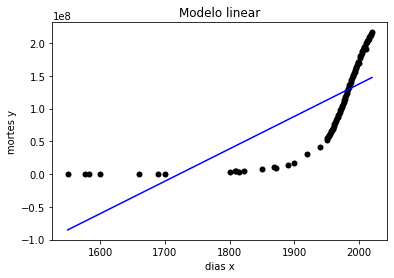

In [6]:
plt.scatter(x, y, color = "black", linewidths = 1e-5)
plt.plot(x, y_hat_linear, color = "blue")
plt.xlabel("dias x")
plt.ylabel("mortes y")
plt.title("Modelo linear")
plt.show()

In [7]:
# Erros
erro_absoluto_linear = np.absolute(y_hat_linear - base_dados.iloc[:, 1].values).mean()
erro_relativo_linear = np.absolute(y_hat_linear - base_dados.iloc[:, 1].values).mean() / np.absolute(base_dados.iloc[:, 1].values).mean()
print(f'Erro Absoluto: {erro_absoluto_linear:.4e}')
print(f'Erro Relativo: {erro_relativo_linear:.4}')

Erro Absoluto: 3.9615e+07
Erro Relativo: 0.3674


*Modelo Exponencial*


In [8]:
lamb = np.exp((1 / alpha) * (soma_lny * soma_x2 - soma_x * soma_xlny))
beta = (1 / alpha) * (m * soma_xlny - soma_x * soma_lny)
print(f'Modelo exponencial: f(x) = {lamb}exp({beta}x)')

x = base_dados.iloc[:, 0].values
y = base_dados.iloc[:, 1].values
y_hat_exp = lamb * np.exp(beta * x)
erro_exp = sum((y_hat_exp - base_dados.iloc[:,1].values)**2)
print(f'Erro: E = {erro_exp:.1e}')

Modelo exponencial: f(x) = 3.8966262218155477e-10exp(0.020297594421441682x)
Erro: E = 8.8e+15


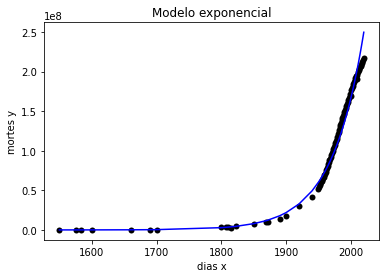

In [9]:
plt.scatter(x, y, color = "black", linewidths = 1e-5)
plt.plot(x, y_hat_exp, color = "blue")
plt.xlabel("dias x")
plt.ylabel("mortes y")
plt.title("Modelo exponencial")
plt.show()

In [10]:
# Erros
erro_absoluto_exp = np.absolute(y_hat_exp - base_dados.iloc[:, 1].values).mean()
erro_relativo_exp = np.absolute(y_hat_exp - base_dados.iloc[:, 1].values).mean() / np.absolute(base_dados.iloc[:, 1].values).mean()
print(f'Erro Absoluto: {erro_absoluto_exp:.4e}')
print(f'Erro Relativo: {erro_relativo_exp:.4}')

Erro Absoluto: 7.2566e+06
Erro Relativo: 0.06731


*Modelo Quadrático*

In [11]:
A = (m * soma_xy - soma_x * soma_y) / (m * soma_x2 - (soma_x)**2)
B = (m * soma_x3 - soma_x2 * soma_x) / (m * soma_x2 - (soma_x)**2)
C = soma_x3 - (1 / m) * (soma_x * soma_x2)
a2 = (m * soma_x2y - soma_x2 * soma_y - m * A * C)/(m * soma_x4 - (soma_x2)**2 - m * B * C)
a1 = A - B * a2
a0 = (1 / m) * (soma_y - A * soma_x - (soma_x2 - B * soma_x) * a2)
print(f'Modelo quadrático: f(x) = {a0} + {a1}x + {a2}x^2')

x = base_dados.iloc[:, 0].values
y = base_dados.iloc[:, 1].values
y_hat_quad = a0 + a1 * x + a2 * (x)**2
erro_quad = sum((y_hat_quad - base_dados.iloc[:,1].values)**2)
print(f'Erro: E = {erro_quad:.1e}')

Modelo quadrático: f(x) = 8944186830.994364 + -10368965.606485847x + 2988.1413368673743x^2
Erro: E = 4.8e+16


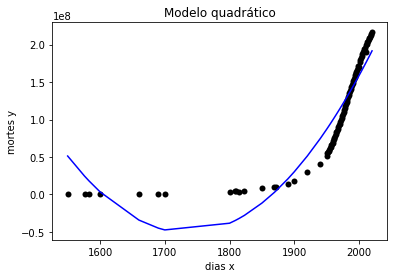

In [12]:
plt.scatter(x, y, color = "black", linewidths = 1e-5)
plt.plot(x, y_hat_quad, color = "blue")
plt.xlabel("dias x")
plt.ylabel("mortes y")
plt.title("Modelo quadrático")
plt.show()

In [13]:
# Erros
erro_absoluto_quad = np.absolute(y_hat_quad - base_dados.iloc[:, 1].values).mean()
erro_relativo_quad = np.absolute(y_hat_quad - base_dados.iloc[:, 1].values).mean() / np.absolute(base_dados.iloc[:, 1].values).mean()
print(f'Erro Absoluto: {erro_absoluto_quad:.4e}')
print(f'Erro Relativo: {erro_relativo_quad:.4}')

Erro Absoluto: 2.0109e+07
Erro Relativo: 0.1865


*Modelo Exponencial de uma Quadrática*

In [14]:
A = (m * soma_xlny - soma_x * soma_lny) / (m * soma_x2 - (soma_x)**2)
B = (m * soma_x3 - soma_x2 * soma_x) / (m * soma_x2 - (soma_x)**2)
C = soma_x3 - (1 / m) * (soma_x * soma_x2)
a2 = (m * soma_x2lny - soma_x2 * soma_lny - m * A * C)/(m * soma_x4 - (soma_x2)**2 - m * B * C)
a1 = A - B * a2
a0 = (1 / m) * (soma_lny - A * soma_x - (soma_x2 - B * soma_x) * a2)
print(f'Modelo exponencial de uma quadrática: f(x) = exp({a0} + {a1}x + {a2}x^2)')

x = base_dados.iloc[:, 0].values
y = base_dados.iloc[:, 1].values
y_hat_exp_quad = np.exp(a0 + a1 * x + a2 * (x)**2)
erro_exp_quad = sum((y_hat_exp_quad - base_dados.iloc[:,1].values)**2)
print(f'E = {erro_exp_quad:.1e}')

Modelo exponencial de uma quadrática: f(x) = exp(-17.177960379080893 + 0.015320929448446475x + 1.3688211221306755e-06x^2)
E = 1.0e+16


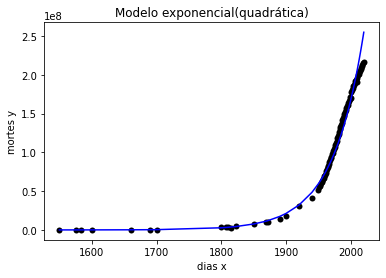

In [15]:
plt.scatter(x, y, color = "black", linewidths = 1e-5)
plt.plot(x, y_hat_exp_quad, color = "blue")
plt.xlabel("dias x")
plt.ylabel("mortes y")
plt.title("Modelo exponencial(quadrática)")
plt.show()

In [16]:
# Erros
erro_absoluto_exp_quad = np.absolute(y_hat_exp_quad - base_dados.iloc[:, 1].values).mean()
erro_relativo_exp_quad = np.absolute(y_hat_exp_quad - base_dados.iloc[:, 1].values).mean() / np.absolute(base_dados.iloc[:, 1].values).mean()
print(f'Erro Absoluto: {erro_absoluto_exp_quad:.4e}')
print(f'Erro Relativo: {erro_relativo_exp_quad:.4}')

Erro Absoluto: 7.4763e+06
Erro Relativo: 0.06934


Comparação entre os erros dos modelos de mínimos quadrados

In [17]:
data = {
'Modelo': ['linear', 'exponencial', 'quadrático', 'exponencial de quadrática'],
'Erro (E)': [erro_linear, erro_exp, erro_quad, erro_exp_quad],
'Erro Relativo': [erro_relativo_linear, erro_relativo_exp, erro_relativo_quad, erro_relativo_exp_quad]
}
erros = pd.DataFrame(data, columns=['Modelo', 'Erro (E)', 'Erro Relativo'])
erros

,Modelo,Erro (E),Erro Relativo
0,linear,1.788380e+17,0.367434
1,exponencial,8.827759e+15,0.067306
2,quadrático,4.793150e+16,0.186515
3,exponencial de quadrática,1.045309e+16,0.069344


Dados do Futuro

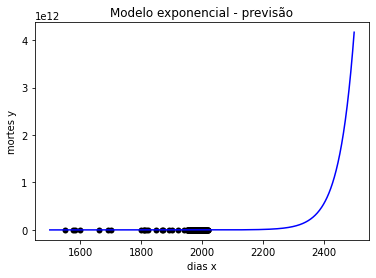

In [18]:
x = base_dados.iloc[:, 0].values
y = base_dados.iloc[:, 1].values
y_hat_exp = lamb * np.exp(beta * np.arange(1500, 2500, 1))
plt.scatter(x, y, color = "black", linewidths = 1e-5)
plt.plot(np.arange(1500, 2500, 1), y_hat_exp, color = "blue")
plt.xlabel("dias x")
plt.ylabel("mortes y")
plt.title("Modelo exponencial - previsão")
plt.show()

In [19]:
print(f'Em {2021} população do Brasil será de {lamb * np.exp(beta * 2021)} habitantes.')
print(f'Em {2030} população do Brasil será de {lamb * np.exp(beta * 2030)} habitantes.')
print(f'Em {2040} população do Brasil será de {lamb * np.exp(beta * 2040)} habitantes.')

Em 2021 população do Brasil será de 254725869.47589672 habitantes.
Em 2030 população do Brasil será de 305780124.11781955 habitantes.
Em 2040 população do Brasil será de 374593800.1375205 habitantes.


***ANÁISE II - CRESCIMENTO DE BACTÉRIA***

Carregando os dados

In [20]:
base_dados = pd.read_csv('bacteria.csv', sep = ";") # número de bactérias por unidade de volume
base_dados.head()

,horas,volume_unitario
0,0,32
1,1,47
2,2,65
3,3,92
4,4,132


In [21]:
base_dados.describe()

,horas,volume_unitario
count,7.000000,7.00000
mean,3.000000,119.00000
std,2.160247,87.50619
min,0.000000,32.00000
25%,1.500000,56.00000
50%,3.000000,92.00000
75%,4.500000,161.00000
max,6.000000,275.00000


Fazendo os calculos intermediários

In [0]:
soma_x = sum(base_dados.iloc[:,0].values)
soma_x2 = sum(base_dados.iloc[:,0].values**2)
soma_x3 = sum(base_dados.iloc[:,0].values**3)
soma_x4 = sum(base_dados.iloc[:,0].values**4)

soma_y = sum(base_dados.iloc[:,1].values)
soma_lny = sum(np.log(base_dados.iloc[:,1].values))

soma_xy = sum(base_dados.iloc[:,0].values * base_dados.iloc[:,1].values)
soma_x2y = sum(base_dados.iloc[:,0].values**2 * base_dados.iloc[:,1].values)
soma_xlny = sum(base_dados.iloc[:,0].values * np.log(base_dados.iloc[:,1].values))
soma_x2lny = sum(base_dados.iloc[:,0].values**2 * np.log(base_dados.iloc[:,1].values))

m = len(base_dados.iloc[:,0].values)
alpha = m * soma_x2 - (soma_x)**2

*Ajuste dos modelos*

In [23]:
# modelo linear
a0 = (1 / alpha) * (soma_y * soma_x2 - soma_x * soma_xy)
a1 = (1 / alpha) * (m * soma_xy - soma_x * soma_y)
print(f'Modelo linear: f(x) = {a0:.5} + {a1:.5}x')

x = base_dados.iloc[:, 0].values
y = base_dados.iloc[:, 1].values
y_hat_linear = a0 + a1 * x
erro_linear = sum((y_hat_linear - base_dados.iloc[:,1].values)**2)
print(f'Erro: E = {erro_linear:.4e}')
print()

# modelo exponencial
lamb = np.exp((1 / alpha) * (soma_lny * soma_x2 - soma_x * soma_xlny))
beta = (1 / alpha) * (m * soma_xlny - soma_x * soma_lny)
print(f'Modelo exponencial: f(x) = {lamb:.5}exp({beta:.5}x)')

y_hat_exp = lamb * np.exp(beta * x)
erro_exp = sum((y_hat_exp - base_dados.iloc[:,1].values)**2)
print(f'Erro: E = {erro_exp:.4e}')
print()

# modelo quadrático
A = (m * soma_xy - soma_x * soma_y) / (m * soma_x2 - (soma_x)**2)
B = (m * soma_x3 - soma_x2 * soma_x) / (m * soma_x2 - (soma_x)**2)
C = soma_x3 - (1 / m) * (soma_x * soma_x2)
a2 = (m * soma_x2y - soma_x2 * soma_y - m * A * C)/(m * soma_x4 - (soma_x2)**2 - m * B * C)
a1 = A - B * a2
a0 = (1 / m) * (soma_y - A * soma_x - (soma_x2 - B * soma_x) * a2)
print(f'Modelo quadrático: f(x) = {a0:.5} + {a1:.5}x + {a2:.5}x^2')

y_hat_quad = a0 + a1 * x + a2 * (x)**2
erro_quad = sum((y_hat_quad - base_dados.iloc[:,1].values)**2)
print(f'Erro: E = {erro_quad:.4e}')
print()

# modelo exponencial de uma quadrática
A = (m * soma_xlny - soma_x * soma_lny) / (m * soma_x2 - (soma_x)**2)
B = (m * soma_x3 - soma_x2 * soma_x) / (m * soma_x2 - (soma_x)**2)
C = soma_x3 - (1 / m) * (soma_x * soma_x2)
a2 = (m * soma_x2lny - soma_x2 * soma_lny - m * A * C)/(m * soma_x4 - (soma_x2)**2 - m * B * C)
a1 = A - B * a2
a0 = (1 / m) * (soma_lny - A * soma_x - (soma_x2 - B * soma_x) * a2)
print(f'Modelo exponencial de uma quadrática: f(x) = exp({a0:.5} + {a1:.5}x + {a2:.5}x^2)')

y_hat_exp_quad = np.exp(a0 + a1 * x + a2 * (x)**2)
erro_exp_quad = sum((y_hat_exp_quad - base_dados.iloc[:,1].values)**2)
print(f'E = {erro_exp_quad:.4e}')
print()

Modelo linear: f(x) = 3.0714 + 38.643x
Erro: E = 4.1324e+03

Modelo exponencial: f(x) = 32.147exp(0.35555x)
Erro: E = 1.8142e+01

Modelo quadrático: f(x) = 37.357 + -2.5x + 6.8571x^2
Erro: E = 1.8271e+02

Modelo exponencial de uma quadrática: f(x) = exp(3.4795 + 0.34456x + 0.0018311x^2)
E = 3.5700e+00



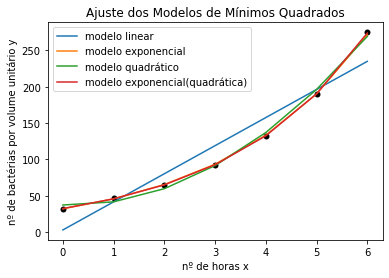

In [24]:
plt.scatter(x, y, color = "black", linewidths = 1e-5)
plt.plot(x, y_hat_linear, label = "modelo linear") # color = "blue"
plt.plot(x, y_hat_exp, label = "modelo exponencial")
plt.plot(x, y_hat_quad, label = "modelo quadrático")
plt.plot(x, y_hat_exp_quad, label = "modelo exponencial(quadrática)")
plt.xlabel("nº de horas x")
plt.ylabel("nº de bactérias por volume unitário y")
plt.title("Ajuste dos Modelos de Mínimos Quadrados")
plt.legend()
plt.show()

In [0]:
# Erros
erro_relativo_linear = np.absolute(y_hat_linear - base_dados.iloc[:, 1].values).mean() / np.absolute(base_dados.iloc[:, 1].values).mean()
erro_relativo_exp = np.absolute(y_hat_exp - base_dados.iloc[:, 1].values).mean() / np.absolute(base_dados.iloc[:, 1].values).mean()
erro_relativo_quad = np.absolute(y_hat_quad - base_dados.iloc[:, 1].values).mean() / np.absolute(base_dados.iloc[:, 1].values).mean()
erro_relativo_exp_quad = np.absolute(y_hat_exp_quad - base_dados.iloc[:, 1].values).mean() / np.absolute(base_dados.iloc[:, 1].values).mean()

Comparação entre os erros da regressão

In [26]:
data = {
'Modelo': ['linear', 'exponencial', 'quadrático', 'exponencial de quadrática'],
'Erro (E)': [erro_linear, erro_exp, erro_quad, erro_exp_quad],
'Erro Relativo': [erro_relativo_linear, erro_relativo_exp, erro_relativo_quad, erro_relativo_exp_quad]
}
erros = pd.DataFrame(data, columns=['Modelo', 'Erro (E)', 'Erro Relativo'])
erros

,Modelo,Erro (E),Erro Relativo
0,linear,4132.428571,0.178357
1,exponencial,18.142097,0.009867
2,quadrático,182.714286,0.040130
3,exponencial de quadrática,3.570047,0.005100


Dados do Futuro

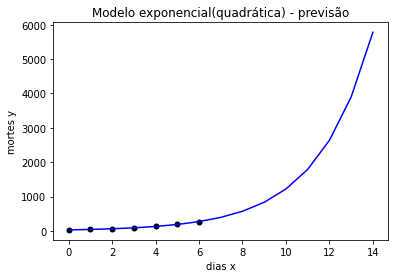

In [27]:
x = base_dados.iloc[:, 0].values
y = base_dados.iloc[:, 1].values
y_hat_exp_quad = np.exp(a0 + a1 * np.arange(0, 15, 1) + a2 * (np.arange(0, 15, 1))**2)
plt.scatter(x, y, color = "black", linewidths = 1e-5)
plt.plot(np.arange(0, 15, 1), y_hat_exp_quad, color = "blue")
plt.xlabel("dias x")
plt.ylabel("mortes y")
plt.title("Modelo exponencial(quadrática) - previsão")
plt.show()

In [28]:
print(f'Em {7} horas tem-se {np.exp(a0 + a1 * 7 + a2 * (7)**2)} bactérias.')
print(f'Em {10} horas tem-se {np.exp(a0 + a1 * 10 + a2 * (10)**2)} bactérias.')
print(f'Em {15} horas tem-se {np.exp(a0 + a1 * 15 + a2 * (15)**2)} bactérias.')

Em 7 horas tem-se 395.87800892937366 bactérias.
Em 10 horas tem-se 1221.9083037170894 bactérias.
Em 15 horas tem-se 8602.87529362393 bactérias.
